Text(0.5, 1.0, 'Perceptron decision regions')

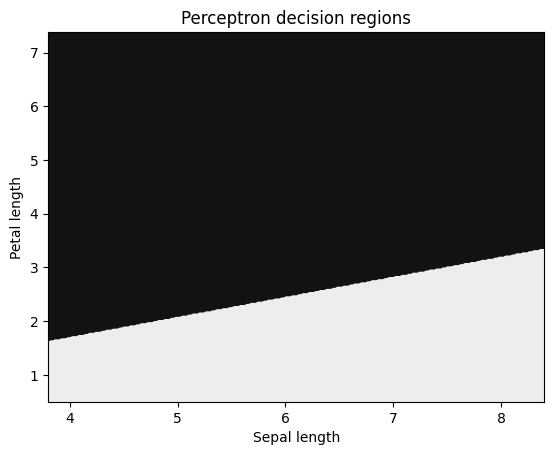

In [2]:
# Write a suitable example to demonstrate the perceptron learning law with its decision regions
# using python. Give the output in graphical form.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()

# extract sepal length and petal length features
X = iris.data[:, [0, 2]]
y = iris.target
w = np.zeros(2) #[0.0 , 0.0]  # to give weightage
b = 0                     # to shift the decision boundary
lr = 0.1        # learning rate
epochs = 50

# setosa is class 0, versicolor is class 1
y = np.where(y == 0, 0, 1)

# define perceptron function
def perceptron(x, w, b):
    # calculate weighted sum of inputs
    z = np.dot(x, w) + b
    # apply step function
    return np.where(z >= 0, 1, 0)

# train the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        target = y[i]
        output = perceptron(x, w, b)
        error = target - output
        # the algorithm assigns more weight to features that contribute more to the error.
        w += lr * error * x
        # The bias affects the decision boundary's position and allows for shifting it
        # up or down without changing the weights.
        b += lr * error

#model train --- adjusted weights and bias

# plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

#plot decision boundary
plt.contourf(xx, yy, Z, cmap="binary")
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron decision regions')